In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder



def assemble_matrix(file_name):
    data = pd.read_csv(file_name).sort_values('class')
    y = pd.DataFrame(data['class'])
    data.drop('class', axis=1, inplace=True)
    feature_encoder = OneHotEncoder(drop='if_binary')
    x = feature_encoder.fit_transform(data).toarray()
    y = feature_encoder.fit_transform(y).toarray()
    return np.transpose(x), y


def rank_r_approximation(r, u, s, v_t):
    return u[:, :r] @ np.diag(s)[0:r, :r] @ v_t[:r, :]

In [8]:
x, y = assemble_matrix('mushrooms.csv')

In [9]:
u, s, v_t = np.linalg.svd(x, full_matrices=False)

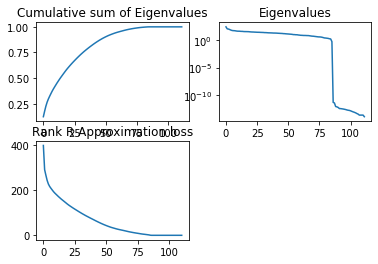

In [10]:
plt.figure()
plt.subplot(221)
plt.title("Cumulative sum of Eigenvalues")
plt.plot(np.arange(len(s)), np.cumsum(s) / np.sum(s))

plt.subplot(222)
plt.title("Eigenvalues")
plt.plot(np.arange(len(s)), s)
plt.yscale('log')

plt.subplot(223)
plt.title("Rank R Approximation loss")
plt.plot(np.arange(len(s) - 1),
         [np.linalg.norm(x - rank_r_approximation(rank, u, s, v_t)) for rank in np.arange(len(s) - 1)])

plt.show()

(112, 3)
(3, 8124)


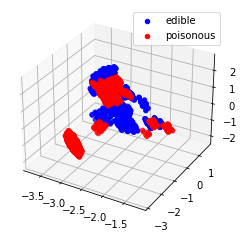

In [11]:


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
base = u[:, [0, 1, 2]]
print(base.shape)
x_ = np.transpose(base) @ x
print(x_.shape)
poisonous_index = np.where(y == 1.0)[0][0]
ax.scatter(x_[0, :poisonous_index], x_[1, :poisonous_index], x_[-1, :poisonous_index], c="blue", label="edible")
ax.scatter(x_[0, poisonous_index:], x_[1, poisonous_index:], x_[-1, poisonous_index:], c="red", label="poisonous")
plt.legend()
plt.show()

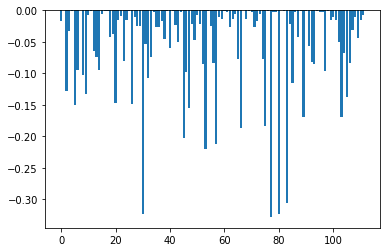

In [12]:
plt.bar(np.arange(len(base[:, 1])), base[:, 0])
plt.show()
